---
title: Bivariate Statistics
subtitle: Foundations of Statistical Analysis in Python
abstract: This notebook explores bivariate relationships through linear correlations, highlighting their strengths and limitations. Practical examples and visualizations are provided to help users understand and apply these statistical concepts effectively.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-05-03
---

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measurement of the relationship between distributions using **linear, rank correlations**.
- Measurement of the relationship between qualitative variables using **contingency**.

## Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
import pandas as pd
df_pokemon = pd.read_csv("data/pokemon.csv")

## Describing *bivariate* data with correlations

- So far, we've been focusing on *univariate data*: a single distribution.
- What if we want to describe how *two distributions* relate to each other?
   - For today, we'll focus on *continuous distributions*.

### Bivariate relationships: `height`

- A classic example of **continuous bivariate data** is the `height` of a `parent` and `child`.  
- [These data were famously collected by Karl Pearson](https://www.kaggle.com/datasets/abhilash04/fathersandsonheight).

In [4]:
df_height = pd.read_csv("data/height.csv", sep="\t")
df_height.head(2)

,Father,Son
0,65.0,59.8
1,63.3,63.2


#### Plotting Pearson's height data

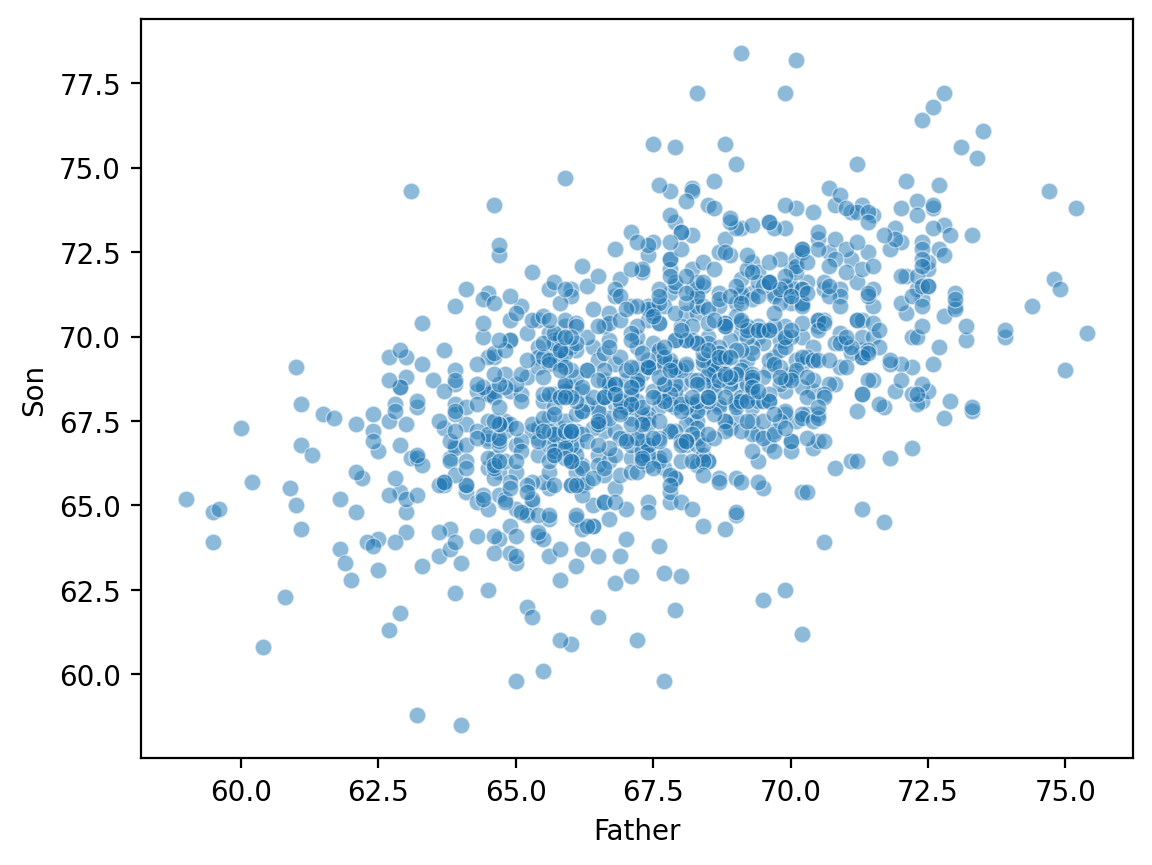

In [5]:
sns.scatterplot(data = df_height, x = "Father", y = "Son", alpha = .5);

### Introducing linear correlations

> A **correlation coefficient** is a number between $[–1, 1]$ that describes the relationship between a pair of variables.

Specifically, **Pearson's correlation coefficient** (or Pearson's $r$) describes a (presumed) *linear* relationship.

Two key properties:

- **Sign**: whether a relationship is positive (+) or negative (–).  
- **Magnitude**: the strength of the linear relationship.

$$
r = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } }
$$

Where:
- $r$ - Pearson correlation coefficient
- $x_i$, $y_i$ - values of the variables
- $\bar{x}$, $\bar{y}$ - arithmetic means
- $n$ - number of observations

Pearson's correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. Its value ranges from -1 to 1:
- 1 → perfect positive linear correlation
- 0 → no linear correlation
- -1 → perfect negative linear correlation

This coefficient does not tell about nonlinear correlations and is sensitive to outliers.

### Calculating Pearson's $r$ with `scipy`

`scipy.stats` has a function called `pearsonr`, which will calculate this relationship for you.

Returns two numbers:

- $r$: the correlation coefficent.  
- $p$: the **p-value** of this correlation coefficient, i.e., whether it's *significantly different* from `0`.

In [6]:
ss.pearsonr(df_height['Father'], df_height['Son'])

PearsonRResult(statistic=np.float64(0.5011626808075912), pvalue=np.float64(1.2729275743662213e-69))

#### Check-in

Using `scipy.stats.pearsonr` (here, `ss.pearsonr`), calculate Pearson's $r$ for the relationship between the `Attack` and `Defense` of Pokemon.

- Is this relationship positive or negative?  
- How strong is this relationship?

In [35]:
print("relationship is positive and is not significant")
ss.pearsonr(df_pokemon['Attack'], df_pokemon['Defense'])

relationship is positive and is not significant


PearsonRResult(statistic=np.float64(0.4386870551184896), pvalue=np.float64(5.8584798642891506e-39))

#### Solution

In [8]:
ss.pearsonr(df_pokemon['Attack'], df_pokemon['Defense'])

PearsonRResult(statistic=np.float64(0.4386870551184896), pvalue=np.float64(5.8584798642891506e-39))

#### Check-in

Pearson'r $r$ measures the *linear correlation* between two variables. Can anyone think of potential limitations to this approach?

### Limitations of Pearson's $r$

- Pearson's $r$ *presumes* a linear relationship and tries to quantify its strength and direction.  
- But many relationships are **non-linear**!  
- Unless we visualize our data, relying only on Pearson'r $r$ could mislead us.

#### Non-linear data where $r = 0$

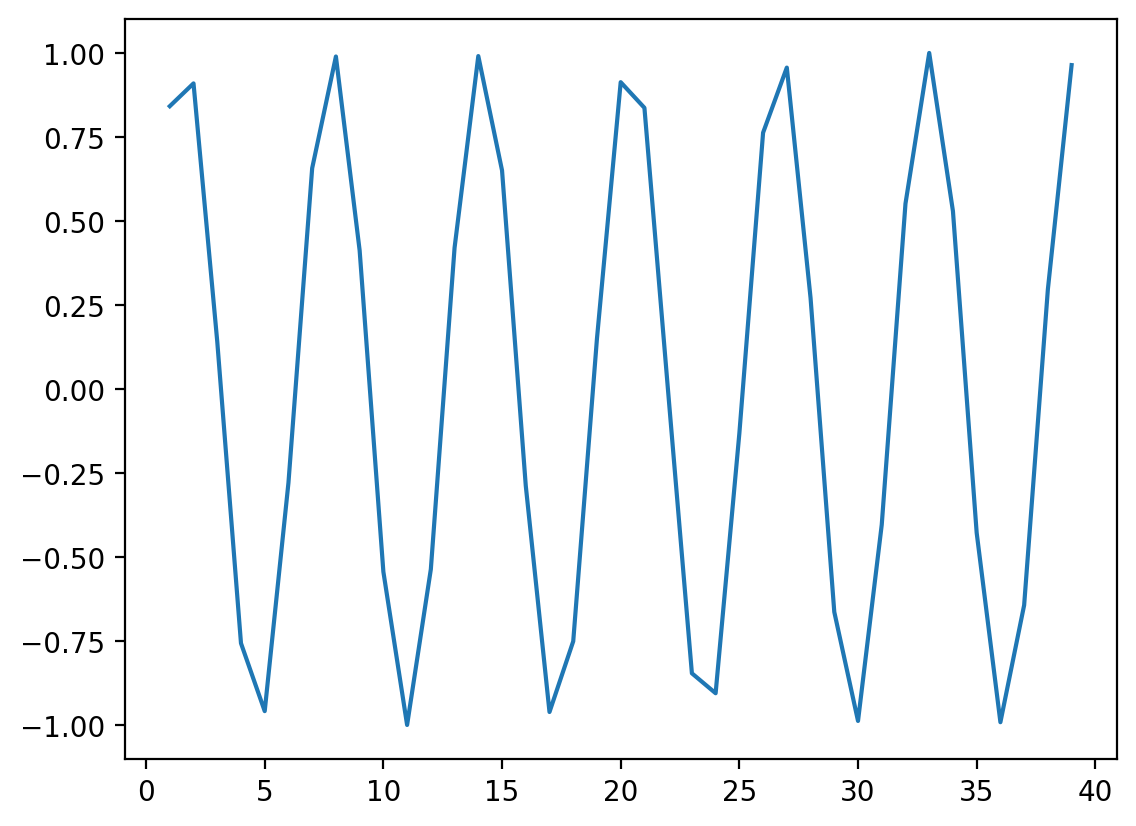

In [9]:
x = np.arange(1, 40)
y = np.sin(x)
p = sns.lineplot(x = x, y = y)

In [10]:
### r is close to 0, despite there being a clear relationship!
ss.pearsonr(x, y)

PearsonRResult(statistic=np.float64(-0.04067793461845843), pvalue=np.float64(0.8057827185936626))

#### When $r$ is invariant to the real relationship

All these datasets have roughly the same **correlation coefficient**.

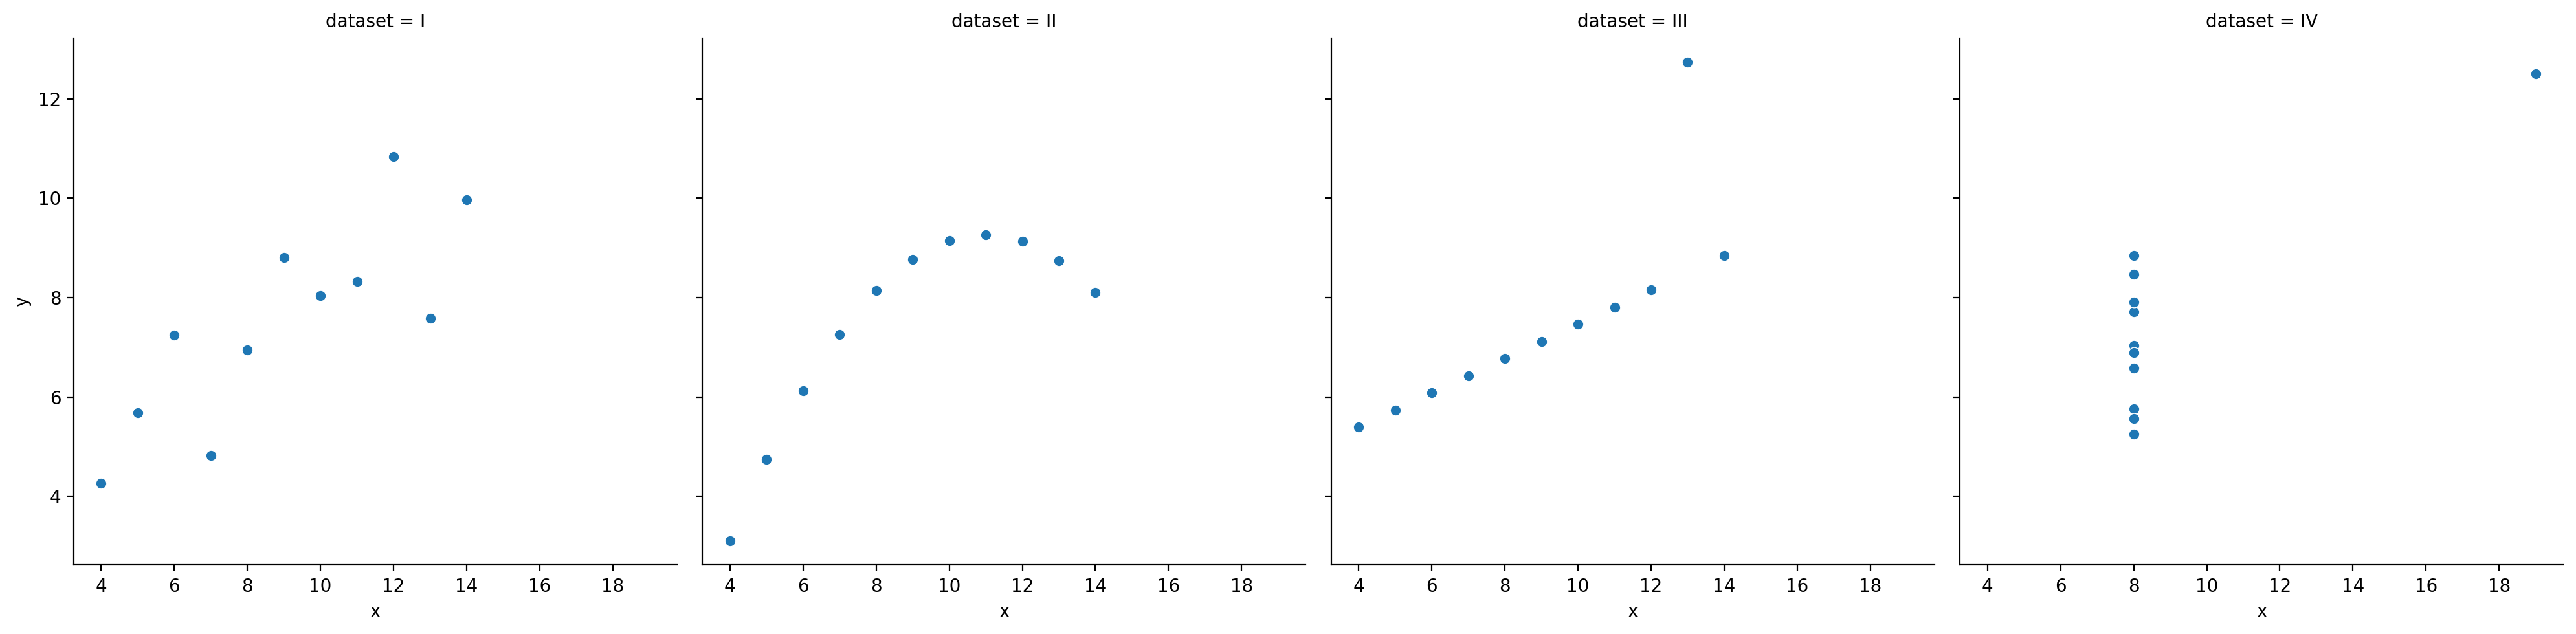

In [11]:
df_anscombe = sns.load_dataset("anscombe")
sns.relplot(data = df_anscombe, x = "x", y = "y", col = "dataset");

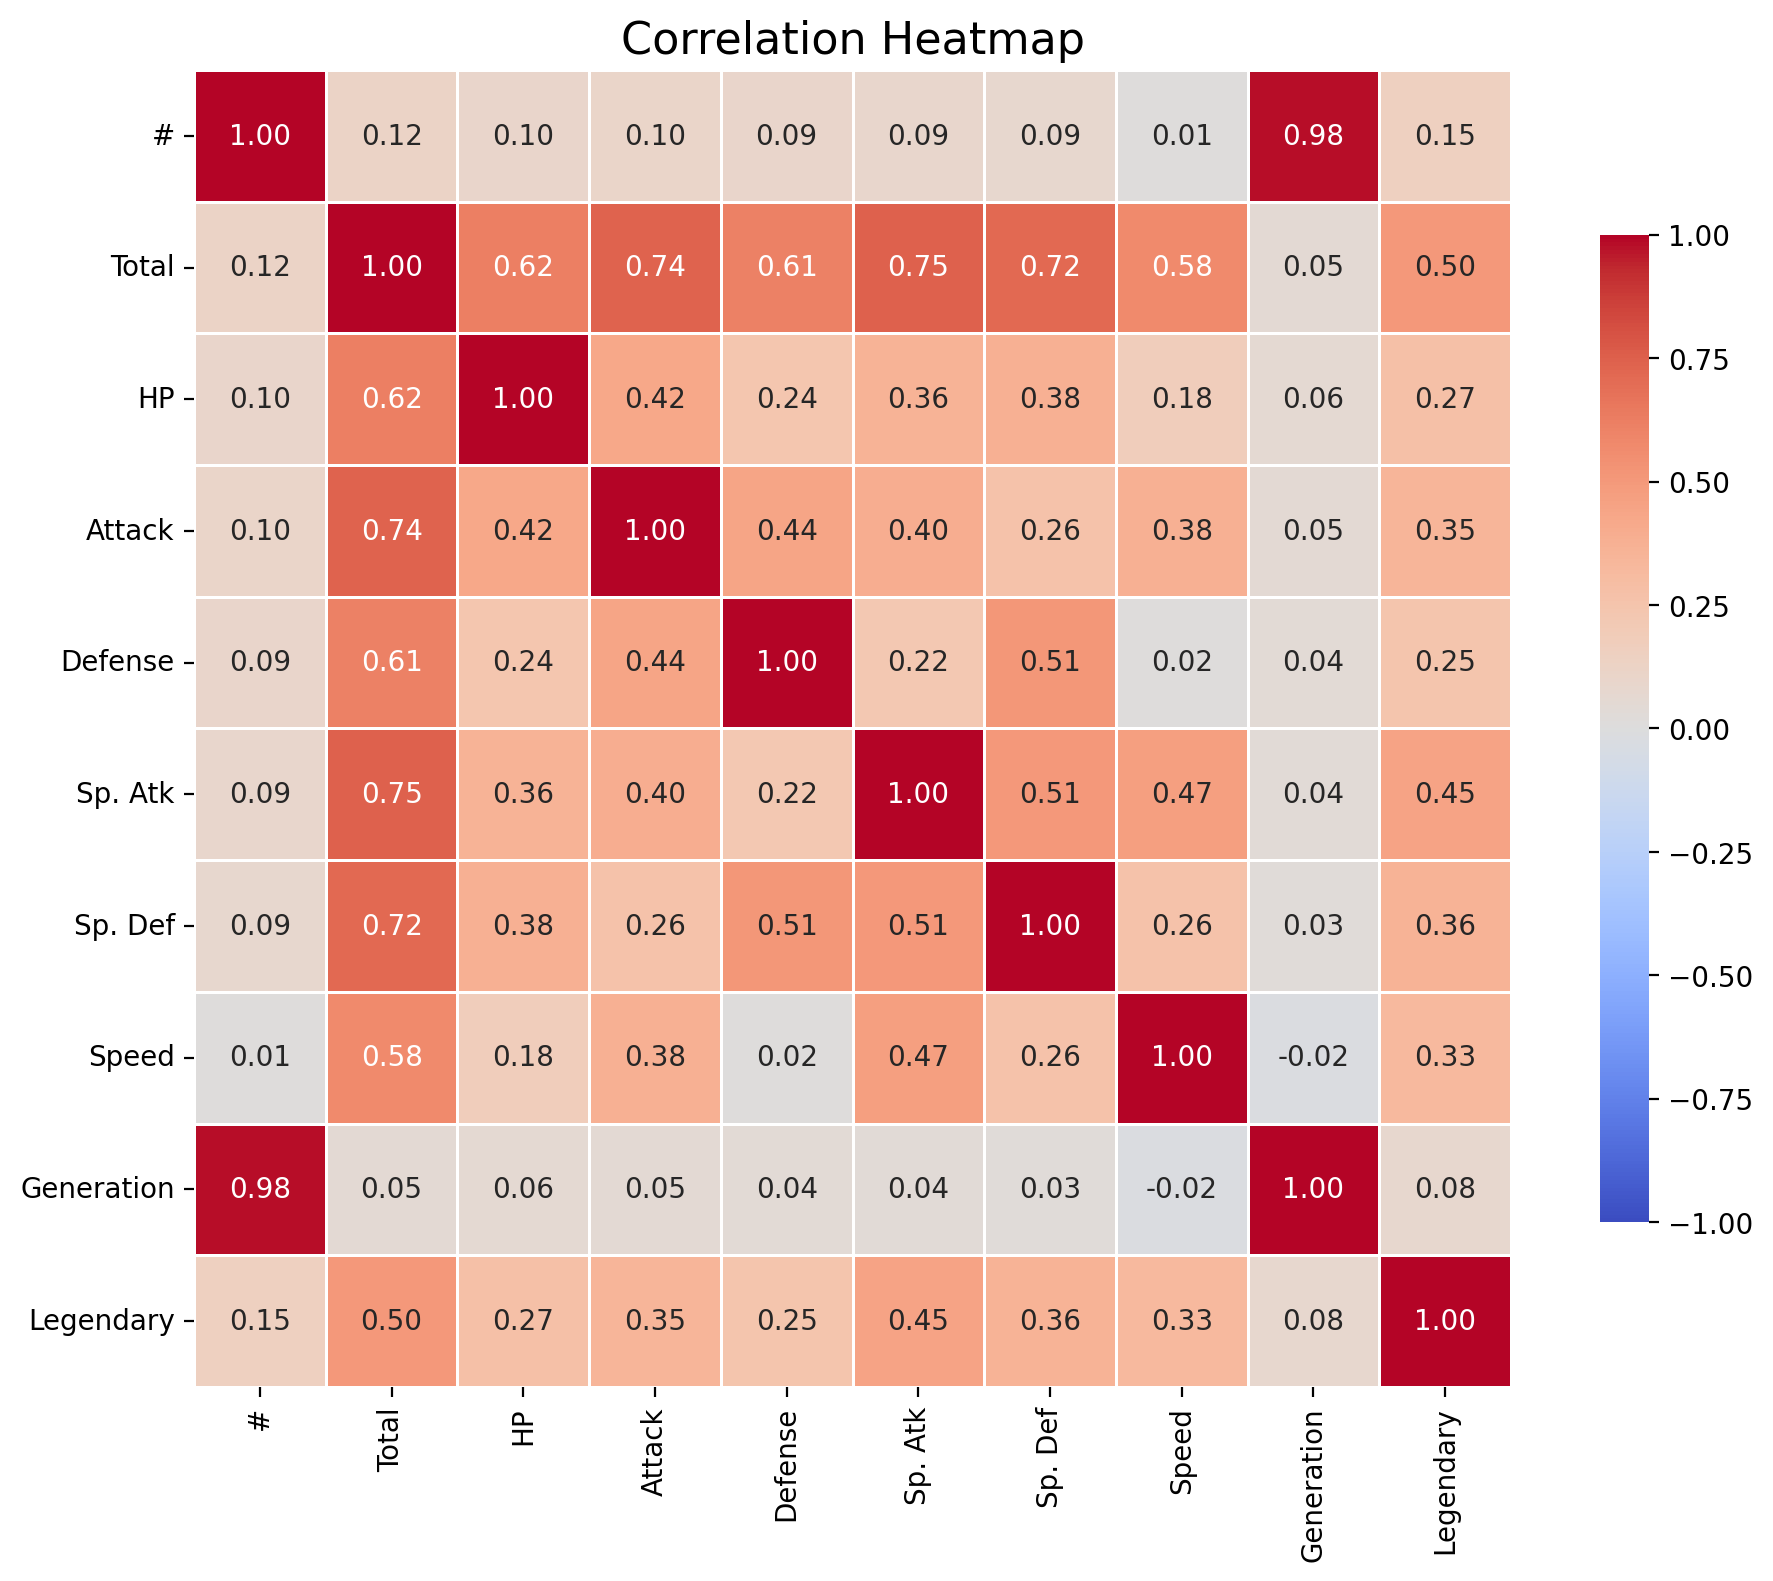

In [12]:
# Compute correlation matrix
corr = df_pokemon.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr, 
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format for coefficients
            cmap="coolwarm",    # Color palette
            vmin=-1, vmax=1,    # Fixed scale
            square=True,        # Make cells square
            linewidths=0.5,     # Line width between cells
            cbar_kws={"shrink": .75})  # Colorbar shrink

# Title and layout
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()

# Show plot
plt.show()

## Rank Correlations

Rank correlations are measures of the strength and direction of a monotonic (increasing or decreasing) relationship between two variables. Instead of numerical values, they use ranks, i.e., positions in an ordered set.

They are less sensitive to outliers and do not require linearity (unlike Pearson's correlation).

### Types of Rank Correlations

1. $ρ$ (rho) **Spearman's**
- Based on the ranks of the data.
- Value: from –1 to 1.
- Works well for monotonic but non-linear relationships.

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Where:
- $d_i$ – differences between the ranks of observations,
- $n$ – number of observations.

2. $τ$ (tau) **Kendall's**
- Measures the number of concordant vs. discordant pairs.
- More conservative than Spearman's – often yields smaller values.
- Also ranges from –1 to 1.

$$
\tau = \frac{(C - D)}{\frac{1}{2}n(n - 1)}
$$

Where:
- $τ$ — Kendall's correlation coefficient,
- $C$ — number of concordant pairs,
- $D$ — number of discordant pairs,
- $n$ — number of observations,
- $\frac{1}{2}n(n - 1)$ — total number of possible pairs of observations.

What are concordant and discordant pairs?
- Concordant pair: if $x_i$ < $x_j$ and $y_i$ < $y_j$, or $x_i$ > $x_j$ and $y_i$ > $y_j$.
- Discordant pair: if $x_i$ < $x_j$ and $y_i$ > $y_j$, or $x_i$ > $x_j$ and $y_i$ < $y_j$.

### When to use rank correlations?
- When the data are not normally distributed.
- When you suspect a non-linear but monotonic relationship.
- When you have rank correlations, such as grades, ranking, preference level.

| Correlation type | Description | When to use |
|------------------|-----------------------------------------------------|----------------------------------------|
| Spearman's (ρ) | Monotonic correlation, based on ranks | When data are nonlinear or have outliers |
| Kendall's (τ) | Counts the proportion of congruent and incongruent pairs | When robustness to ties is important |

### Interpretation of correlation values

| Range of values | Correlation interpretation |
|------------------|----------------------------------|
| 0.8 - 1.0 | very strong positive |
| 0.6 - 0.8 | strong positive |
| 0.4 - 0.6 | moderate positive |
| 0.2 - 0.4 | weak positive |
| 0.0 - 0.2 | very weak or no correlation |
| < 0 | similarly - negative correlation |

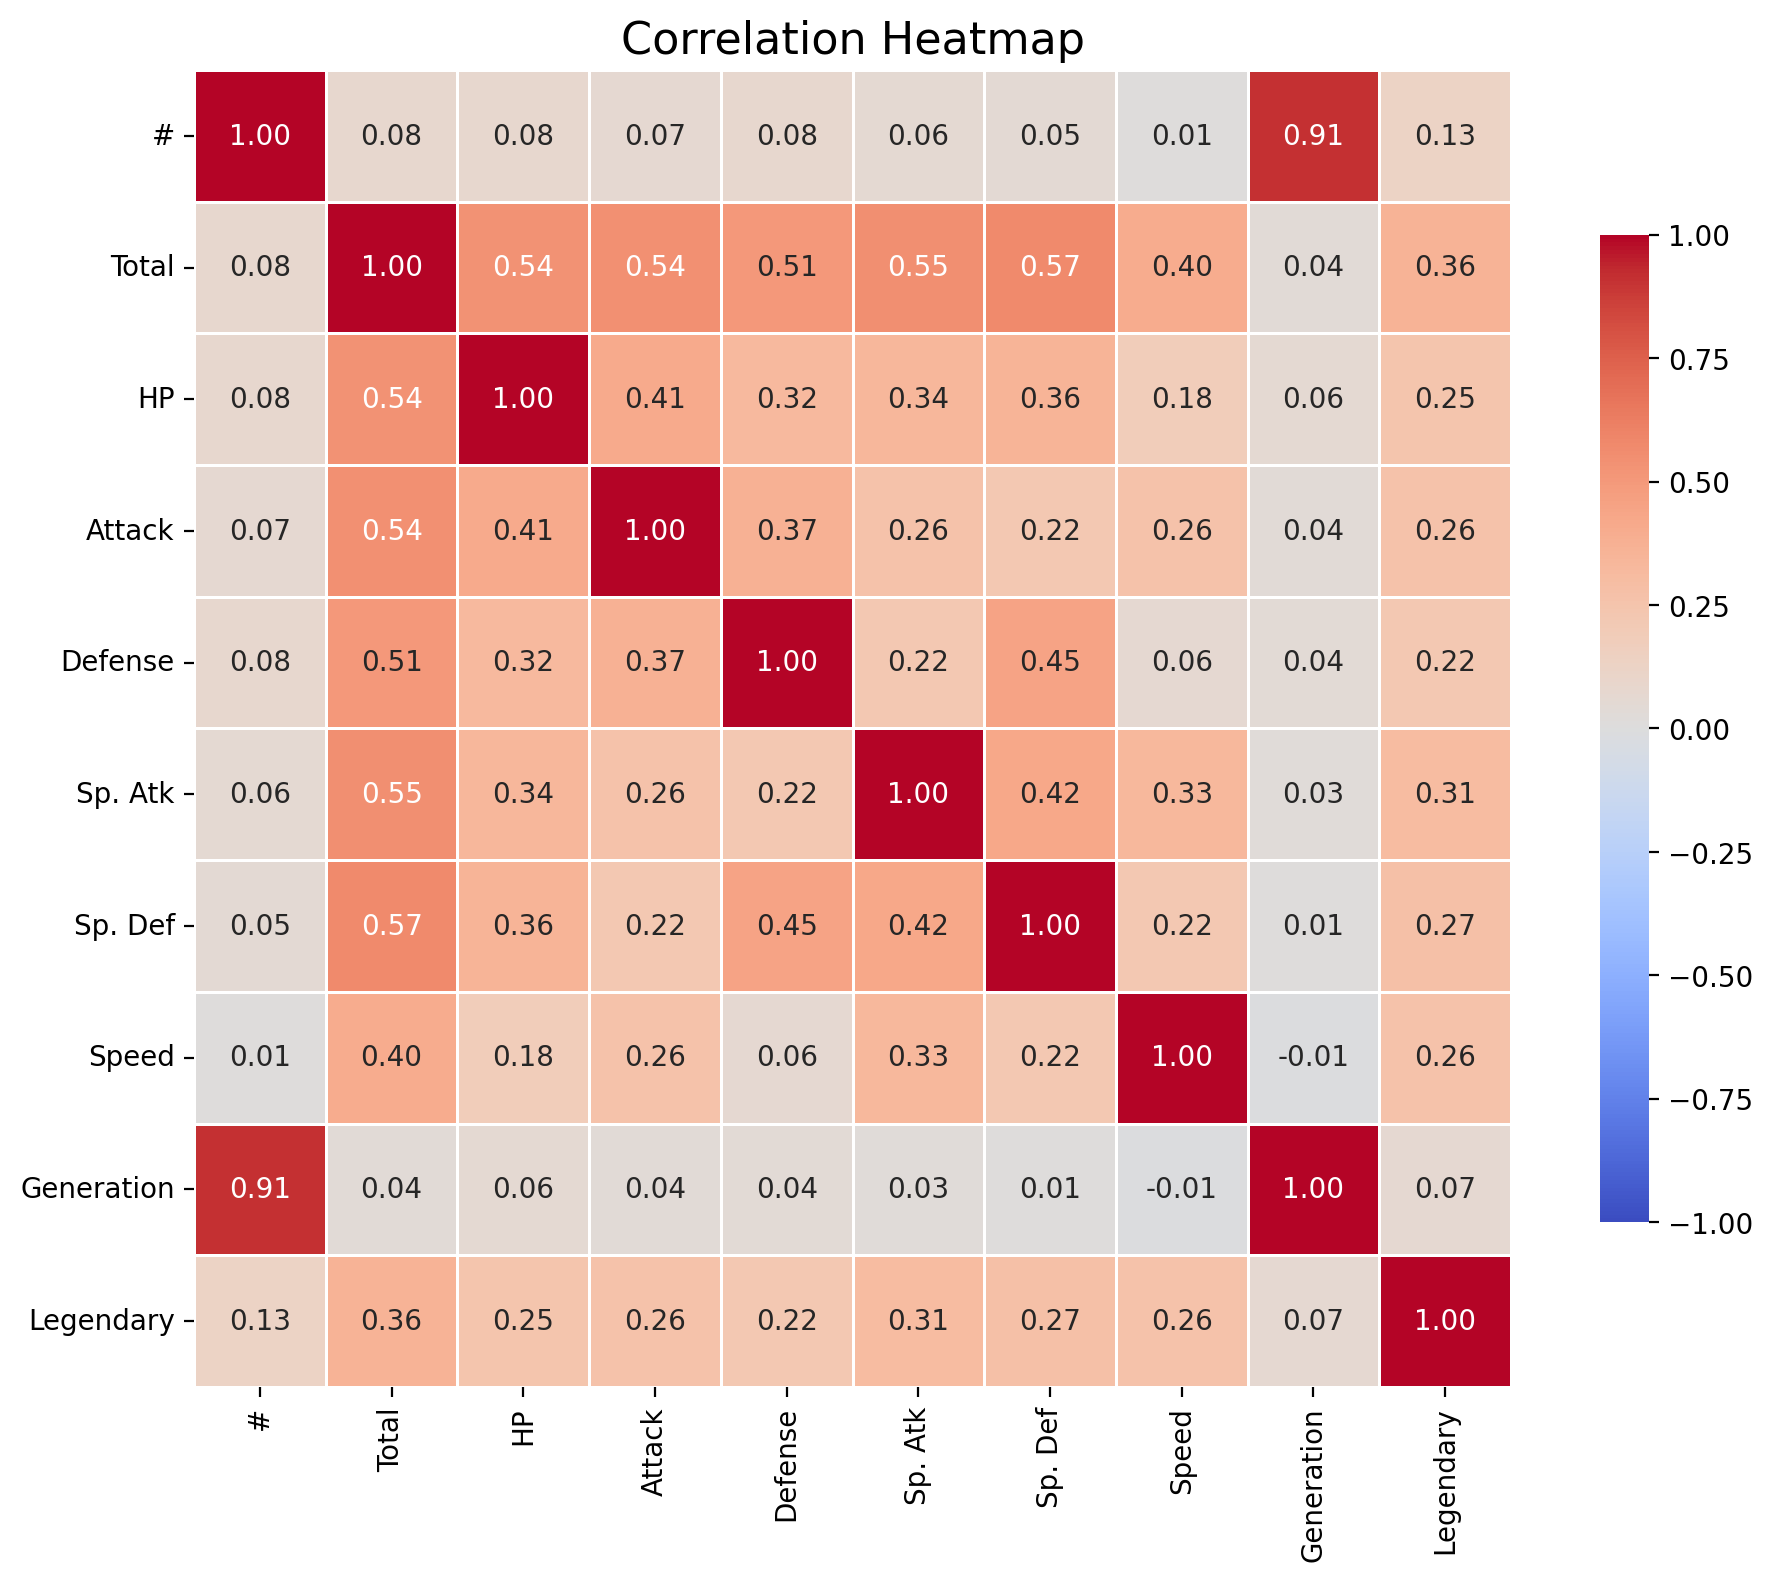

In [107]:
# Compute Kendall rank correlation
corr_kendall = df_pokemon.corr(method='kendall', numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_kendall, 
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format for coefficients
            cmap="coolwarm",    # Color palette
            vmin=-1, vmax=1,    # Fixed scale
            square=True,        # Make cells square
            linewidths=0.5,     # Line width between cells
            cbar_kws={"shrink": .75})  # Colorbar shrink

# Title and layout
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()

# Show plot
plt.show()

### Comparison of Correlation Coefficients

| Property                | Pearson (r)                   | Spearman (ρ)                        | Kendall (τ)                          |
|-------------------------|-------------------------------|--------------------------------------|---------------------------------------|
| What it measures?       | Linear relationship           | Monotonic relationship (based on ranks) | Monotonic relationship (based on pairs) |
| Data type               | Quantitative, normal distribution | Ranks or ordinal/quantitative data  | Ranks or ordinal/quantitative data   |
| Sensitivity to outliers | High                          | Lower                               | Low                                   |
| Value range             | –1 to 1                       | –1 to 1                             | –1 to 1                               |
| Requires linearity      | Yes                           | No                                  | No                                    |
| Robustness to ties      | Low                           | Medium                              | High                                  |
| Interpretation          | Strength and direction of linear relationship | Strength and direction of monotonic relationship | Proportion of concordant vs discordant pairs |
| Significance test       | Yes (`scipy.stats.pearsonr`)  | Yes (`spearmanr`)                   | Yes (`kendalltau`)                   |

Brief summary:
- Pearson - best when the data are normal and the relationship is linear.
- Spearman - works better for non-linear monotonic relationships.
- Kendall - more conservative, often used in social research, less sensitive to small changes in data.

### Your Turn

For the Pokemon dataset, find the pairs of variables that are most appropriate for using one of the quantitative correlation measures. Calculate them, then visualize them.

(PearsonRResult(statistic=np.float64(0.7472498608443283), pvalue=np.float64(8.921321173471932e-144)),
 SignificanceResult(statistic=np.float64(0.7297352095336312), pvalue=np.float64(6.683921620249102e-134)),
 SignificanceResult(statistic=np.float64(0.5539714117786614), pvalue=np.float64(4.587571587996366e-117)))


<Axes: xlabel='Total', ylabel='Sp. Atk'>

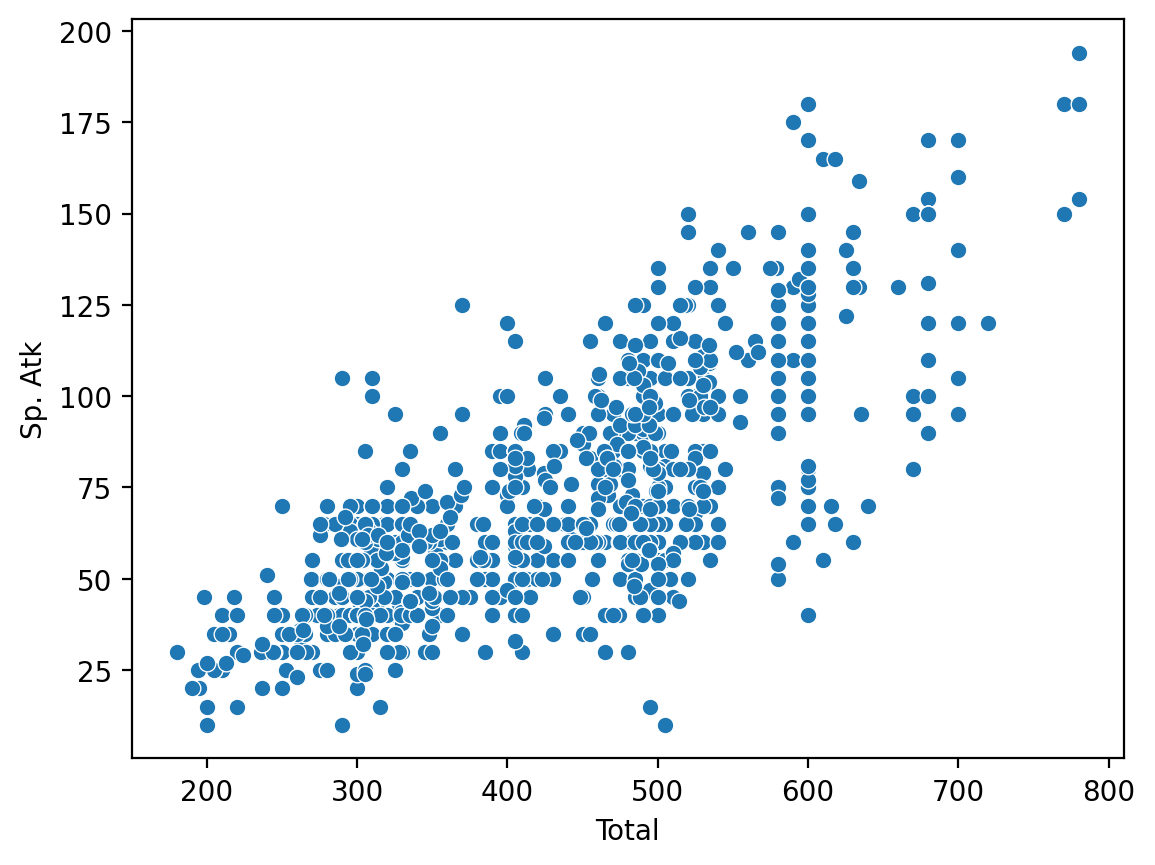

In [44]:
from scipy.stats import pearsonr, spearmanr, kendalltau
from pprint import pprint
## Your code here
df_pokemon.head(5)
pprint((pearsonr(df_pokemon["Total"], df_pokemon["Sp. Atk"]),
spearmanr(df_pokemon["Total"], df_pokemon["Sp. Atk"]),
kendalltau(df_pokemon["Total"], df_pokemon["Sp. Atk"])))

sns.scatterplot(df_pokemon, x="Total", y="Sp. Atk")

## Correlation of Qualitative Variables

A categorical variable is one that takes descriptive values ​​that represent categories—e.g. Pokémon type (Fire, Water, Grass), gender, status (Legendary vs. Normal), etc.

Such variables cannot be analyzed directly using correlation methods for numbers (Pearson, Spearman, Kendall). Other techniques are used instead.

### Contingency Table

A contingency table is a special cross-tabulation table that shows the frequency (i.e., the number of cases) for all possible combinations of two categorical variables.

It is a fundamental tool for analyzing relationships between qualitative features.

#### Chi-Square Test of Independence

The Chi-Square test checks whether there is a statistically significant relationship between two categorical variables.

Concept:

We compare:
- observed values (from the contingency table),
- with expected values, assuming the variables are independent.

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:
- $O_{ij}$ – observed count in cell ($i$, $j$),
- $E_{ij}$ – expected count in cell ($i$, $j$), assuming independence.

### Example: Calculating Expected Values and Chi-Square Statistic in Python

Here’s how you can calculate the **expected values** and **Chi-Square statistic (χ²)** step by step using Python.

---

#### Step 1: Create the Observed Contingency Table
We will use the Pokémon example:

| Type 1 | Legendary = False | Legendary = True | Total |
|--------|-------------------|------------------|-------|
| Fire   | 18                | 5                | 23    |
| Water  | 25                | 3                | 28    |
| Grass  | 20                | 2                | 22    |
| Total  | 63                | 10               | 73    |

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Observed values (contingency table)
observed = np.array([
    [18, 5],  # Fire
    [25, 3],  # Water
    [20, 2]   # Grass
])

# Convert to DataFrame for better visualization
observed_df = pd.DataFrame(
    observed,
    columns=["Legendary = False", "Legendary = True"],
    index=["Fire", "Water", "Grass"]
)
print("Observed Table:")
print(observed_df)

Observed Table:
       Legendary = False  Legendary = True
Fire                  18                 5
Water                 25                 3
Grass                 20                 2


Step 2: Calculate Expected Values
The expected values are calculated using the formula:

$$ E_{ij} = \frac{\text{Row Total} \times \text{Column Total}}{\text{Grand Total}} $$

You can calculate this manually or use scipy.stats.chi2_contingency, which automatically computes the expected values.

In [16]:
# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(observed)

# Convert expected values to DataFrame for better visualization
expected_df = pd.DataFrame(
    expected,
    columns=["Legendary = False", "Legendary = True"],
    index=["Fire", "Water", "Grass"]
)
print("\nExpected Table:")
print(expected_df)


Expected Table:
       Legendary = False  Legendary = True
Fire           19.849315          3.150685
Water          24.164384          3.835616
Grass          18.986301          3.013699


Step 3: Calculate the Chi-Square Statistic
The Chi-Square statistic is calculated using the formula:

$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

This is done automatically by scipy.stats.chi2_contingency, but you can also calculate it manually:

In [17]:
# Manual calculation of Chi-Square statistic
chi2_manual = np.sum((observed - expected) ** 2 / expected)
print(f"\nChi-Square Statistic (manual): {chi2_manual:.4f}")


Chi-Square Statistic (manual): 1.8638


Step 4: Interpret the Results
The chi2_contingency function also returns:

p-value: The probability of observing the data if the null hypothesis (independence) is true.
Degrees of Freedom (dof): Calculated as (rows - 1) * (columns - 1).

In [18]:
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 1.8638
p-value: 0.3938
Degrees of Freedom: 2


**Interpretation of the Chi-Square Test Result:**

| Value               | Meaning                                         |
|---------------------|-------------------------------------------------|
| High χ² value       | Large difference between observed and expected values |
| Low p-value         | Strong basis to reject the null hypothesis of independence |
| p < 0.05            | Statistically significant relationship between variables |

### Qualitative Correlations

#### Cramér's V

**Cramér's V** is a measure of the strength of association between two categorical variables. It is based on the Chi-Square test but scaled to a range of 0–1, making it easier to interpret the strength of the relationship.

$$
V = \sqrt{ \frac{\chi^2}{n \cdot (k - 1)} }
$$

Where:
- $\chi^2$ – Chi-Square test statistic,
- $n$ – number of observations,
- $k$ – the smaller number of categories (rows/columns) in the contingency table.

---

#### Phi Coefficient ($φ$)

Application:
- Both variables must be dichotomous (e.g., Yes/No, 0/1), meaning the table must have the smallest size of **2×2**.
- Ideal for analyzing relationships like gender vs purchase, type vs legendary.

$$
\phi = \sqrt{ \frac{\chi^2}{n} }
$$

Where:
- $\chi^2$ – Chi-Square test statistic for a 2×2 table,
- $n$ – number of observations.

---

#### Tschuprow’s T

**Tschuprow’s T** is a measure of association similar to **Cramér's V**, but it has a different scale. It is mainly used when the number of categories in the two variables differs. This is a more advanced measure applicable to a broader range of contingency tables.

$$
T = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
$$

Where:
- $\chi^2$ – Chi-Square test statistic,
- $n$ – number of observations,
- $k$ – the smaller number of categories (rows or columns) in the contingency table.

Application: Tschuprow’s T is useful when dealing with contingency tables with varying numbers of categories in rows and columns.

---

### Summary - Qualitative Correlations

| Measure            | What it measures                                       | Application                     | Value Range     | Strength Interpretation       |
|--------------------|--------------------------------------------------------|---------------------------------|------------------|-------------------------------|
| **Cramér's V**     | Strength of association between nominal variables      | Any categories                  | 0 – 1           | 0.1–weak, 0.3–moderate, >0.5–strong |
| **Phi ($φ$)**      | Strength of association in a **2×2** table             | Two binary variables            | -1 – 1          | Similar to correlation        |
| **Tschuprow’s T**  | Strength of association, alternative to Cramér's V     | Tables with similar category counts | 0 – 1      | Less commonly used            |
| **Chi² ($χ²$)**    | Statistical test of independence                       | All categorical variables       | 0 – ∞           | Higher values indicate stronger differences |

### Example

Let's investigate whether the Pokémon's type (type_1) is affected by whether the Pokémon is legendary.

We'll use the **scipy** library.

This library already has built-in functions for calculating various qualitative correlation measures.

In [45]:
from scipy.stats.contingency import association

# Contingency table:
ct = pd.crosstab(df_pokemon["Type 1"], df_pokemon["Legendary"])

# Calculating Cramér's V measure
V = association(ct, method="cramer") # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html#association

print(f"Cramer's V: {V}") # interpret!
print("Strenght of association is strong")

Cramer's V: 0.3361928228447545
Strenght of association is strong


### Your turn

What visualization would be most appropriate for presenting a quantitative, ranked, and qualitative relationship?

Try to think about which pairs of variables could have which type of analysis based on the Pokemon data.

---

In [111]:
## Your code and discussion here
from itertools import product

comb = product(df_pokemon.columns, df_pokemon.select_dtypes(include='number').columns)
comb_list = list(comb)
cramers_v = (association(
    pd.crosstab(df_pokemon[x], df_pokemon[y]
), method="cramer") for x, y in comb_list)
cramers_v = np.array(list(cramers_v))

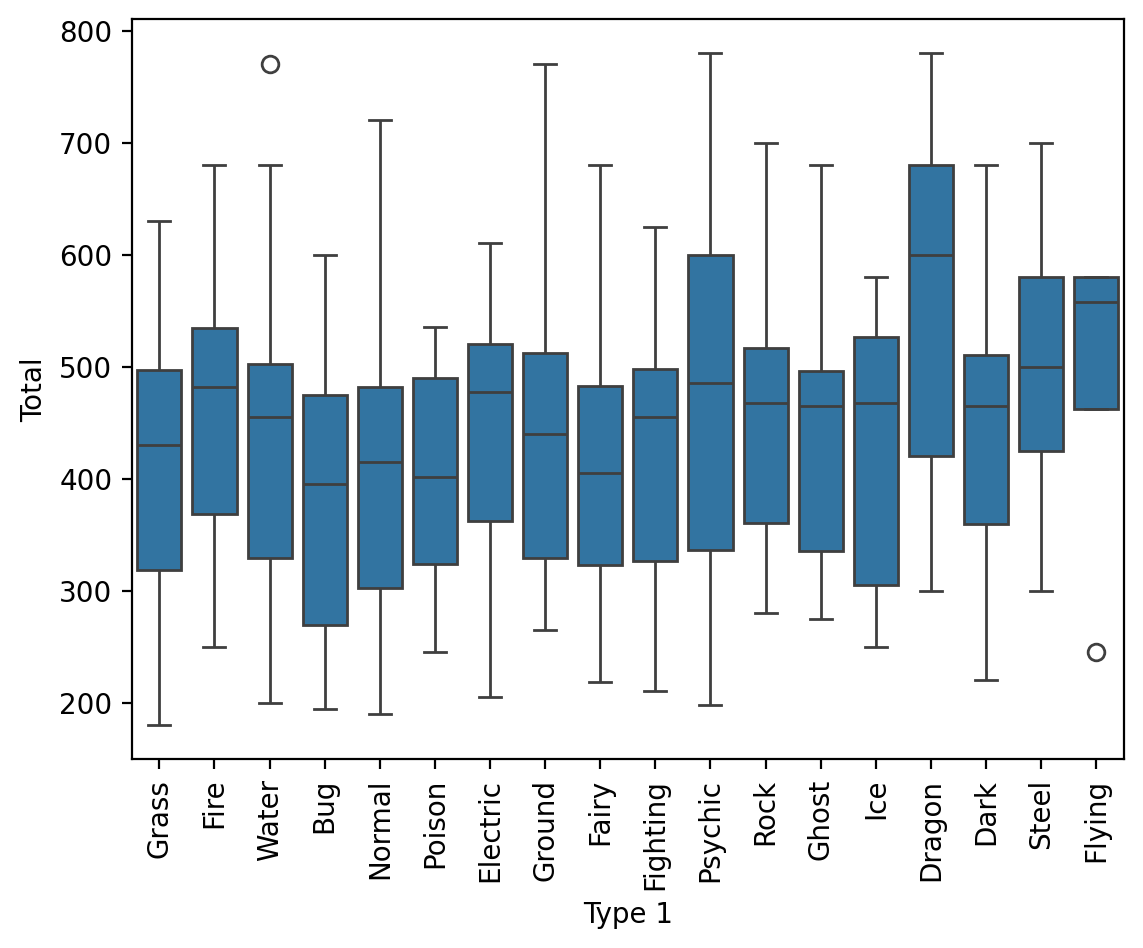

In [122]:
index = np.where(cramers_v < .75)[0][0]
x_axis, y_axis = comb_list[int(index)]

sns.boxplot(df_pokemon, x=x_axis, y=y_axis)
plt.xticks(rotation=90)
plt.show()

## Heatmaps for qualitative correlations

In [27]:
!git clone https://github.com/ayanatherate/dfcorrs.git
!pip install -r dfcorrs/requirements.txt

fatal: destination path 'dfcorrs' already exists and is not an empty directory.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.5 MB/s eta 0:00:0012.3 MB/s eta 0:00:01


In [134]:
from dfcorrs.cramersvcorr import Cramers
cram=Cramers()
cram.corr(df_pokemon)
cram.corr(df_pokemon, plot_htmp=True)


## Your turn!

Load the "sales" dataset and perform the bivariate analysis together with necessary plots. Remember about to run data preprocessing before the analysis.

In [154]:
df_sales = pd.read_excel("data/sales.xlsx")
df_sales.head(5)
df_sales.dtypes

Date               datetime64[ns]
Store_Type                  int64
City_Type                   int64
Day_Temp                  float64
No_of_Customers           float64
Sales                     float64
Product_Quality            object
dtype: object

<Axes: >

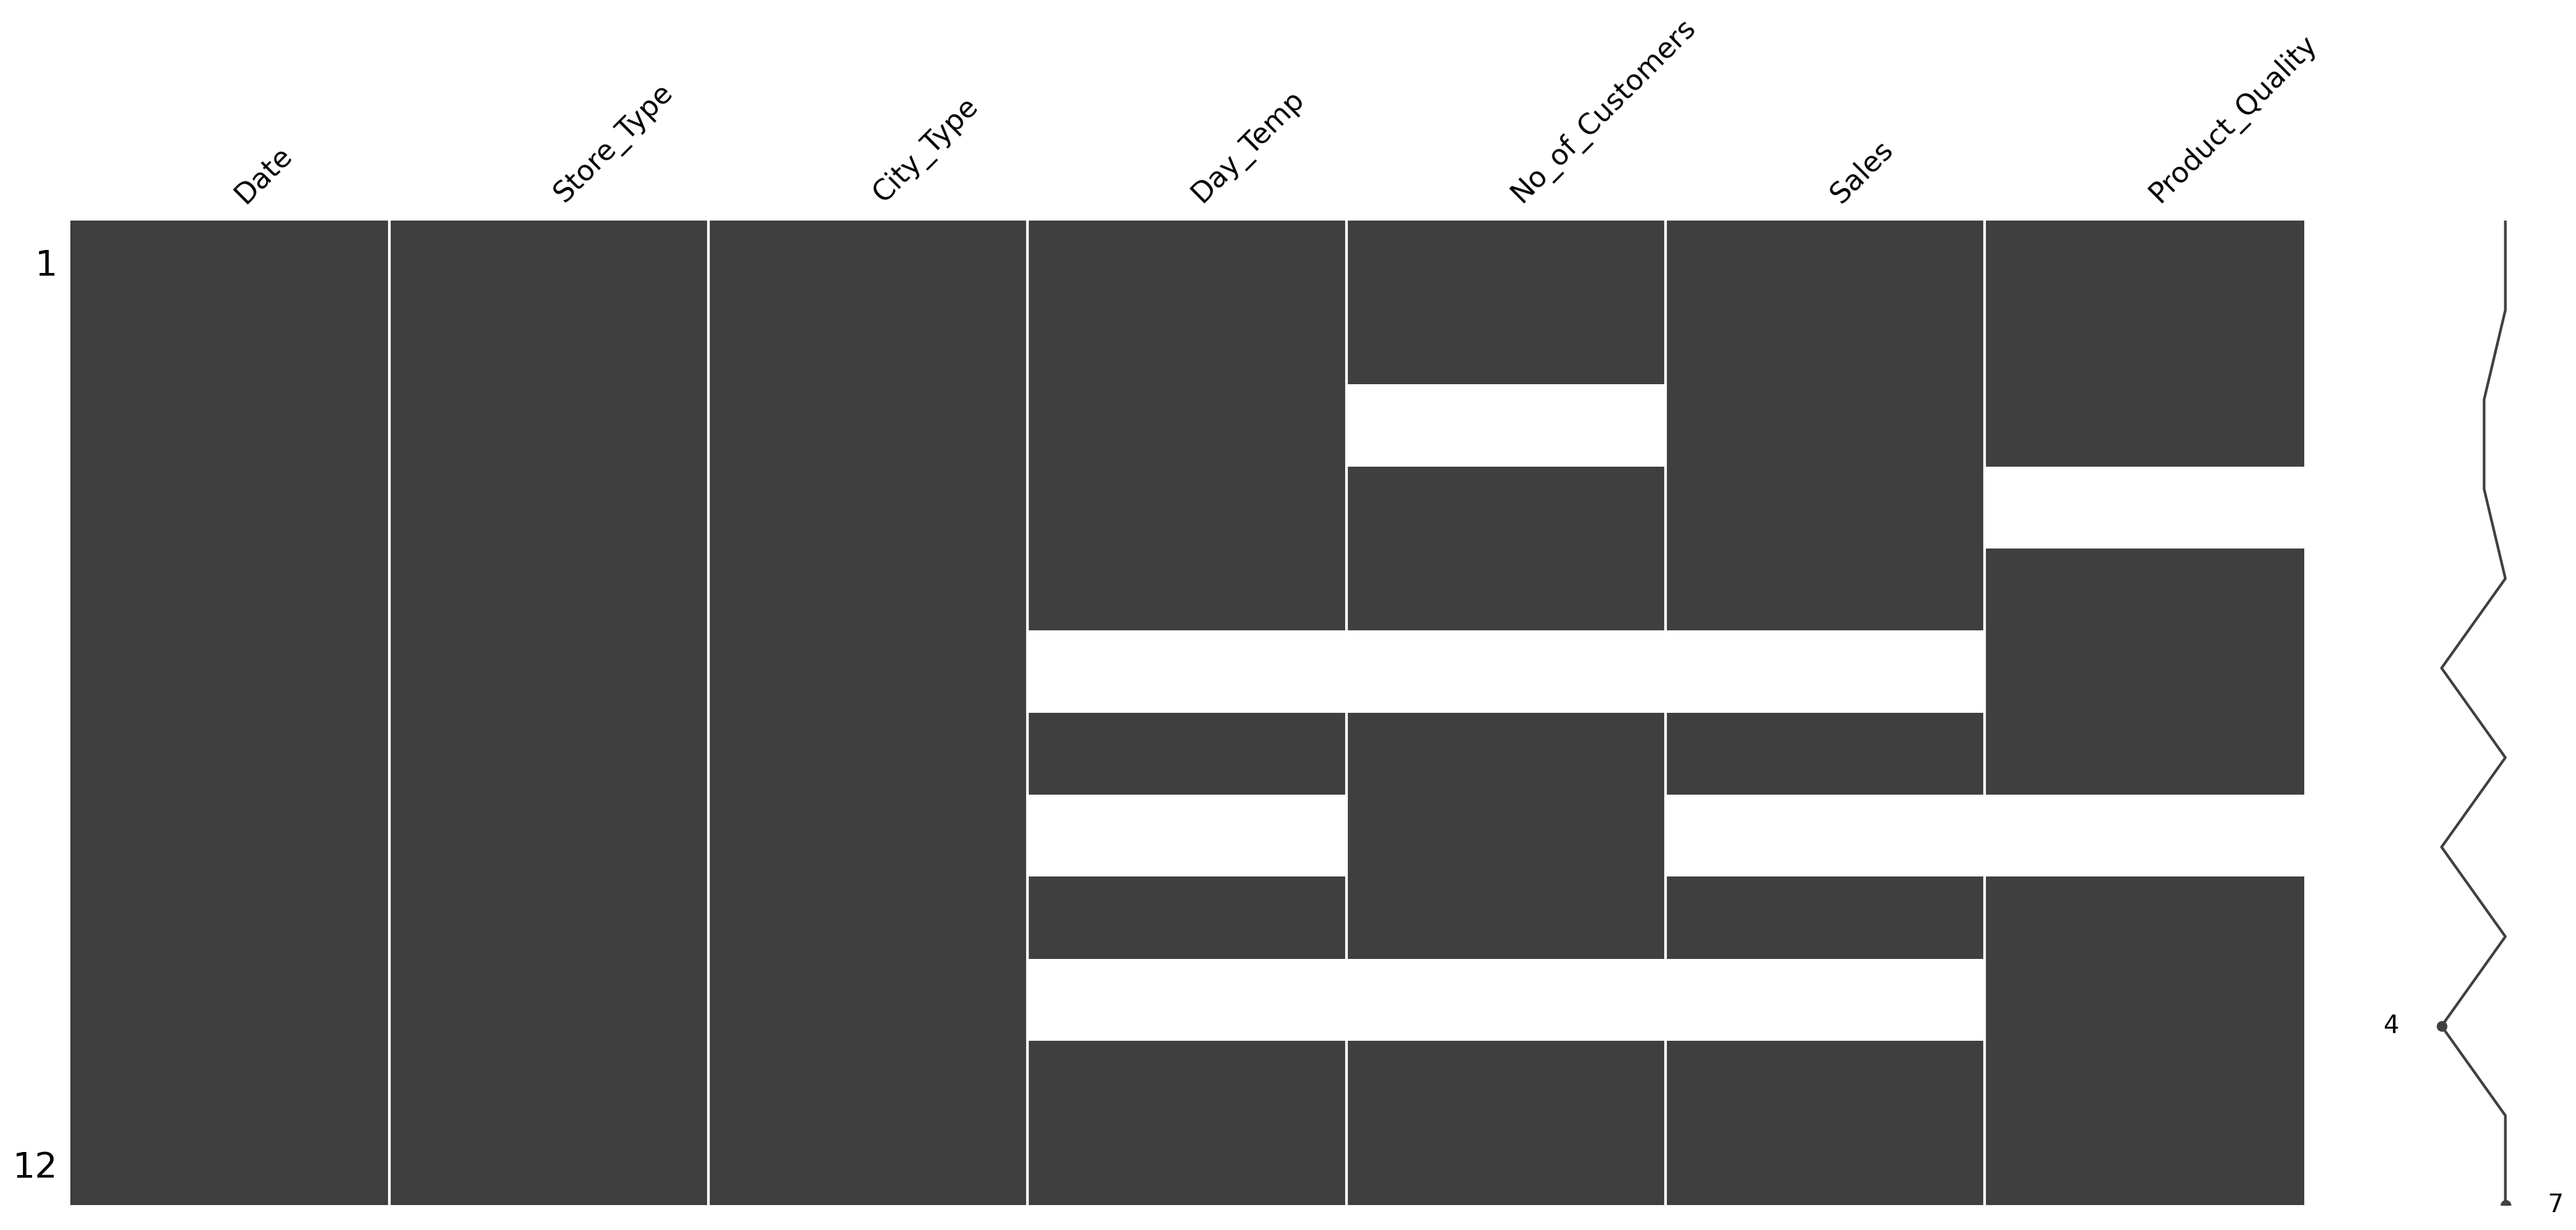

In [132]:
import missingno as msno
msno.matrix(df_sales)

In [157]:
mapping = {x + 1: chr(65 + x) for x in range(26) }
df_sales["Product_Quality"] = df_sales["Product_Quality"].fillna(df_sales["City_Type"].map(mapping))
df_sales.head(5)

,Date,Store_Type,City_Type,Day_Temp,No_of_Customers,Sales,Product_Quality
0,2020-10-01,1,1,30.0,100.0,3112.0,A
1,2020-10-02,2,1,32.0,115.0,3682.0,A
2,2020-10-03,3,3,31.0,NaN,2774.0,A
3,2020-10-04,1,2,29.0,105.0,3182.0,B
4,2020-10-05,1,2,33.0,104.0,1368.0,B


In [160]:
df_sales.interpolate(inplace=True)

<Axes: >

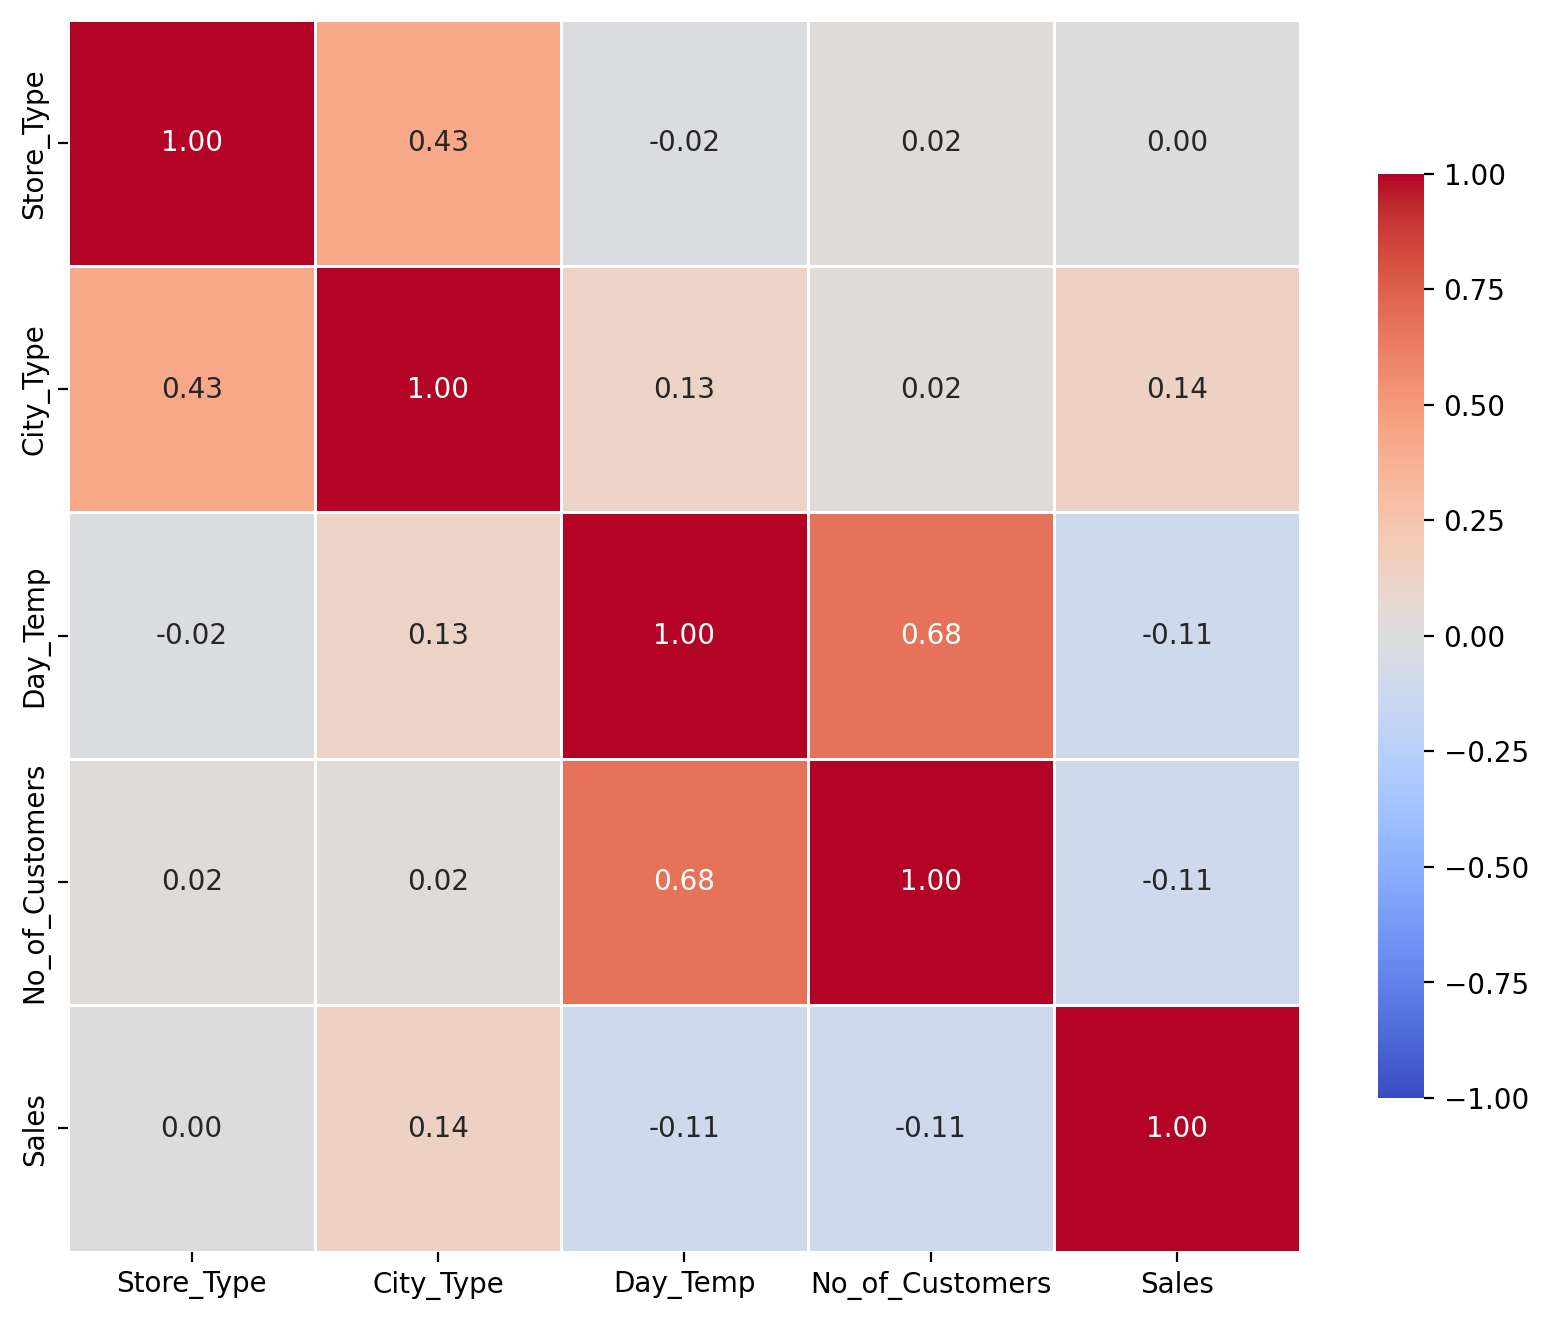

In [161]:
# Compute Kendall rank correlation
corr_kendall = df_sales.corr(method='kendall', numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_kendall, 
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format for coefficients
            cmap="coolwarm",    # Color palette
            vmin=-1, vmax=1,    # Fixed scale
            square=True,        # Make cells square
            linewidths=0.5,     # Line width between cells
            cbar_kws={"shrink": .75})  # Colorbar shrink

<Axes: xlabel='No_of_Customers', ylabel='Day_Temp'>

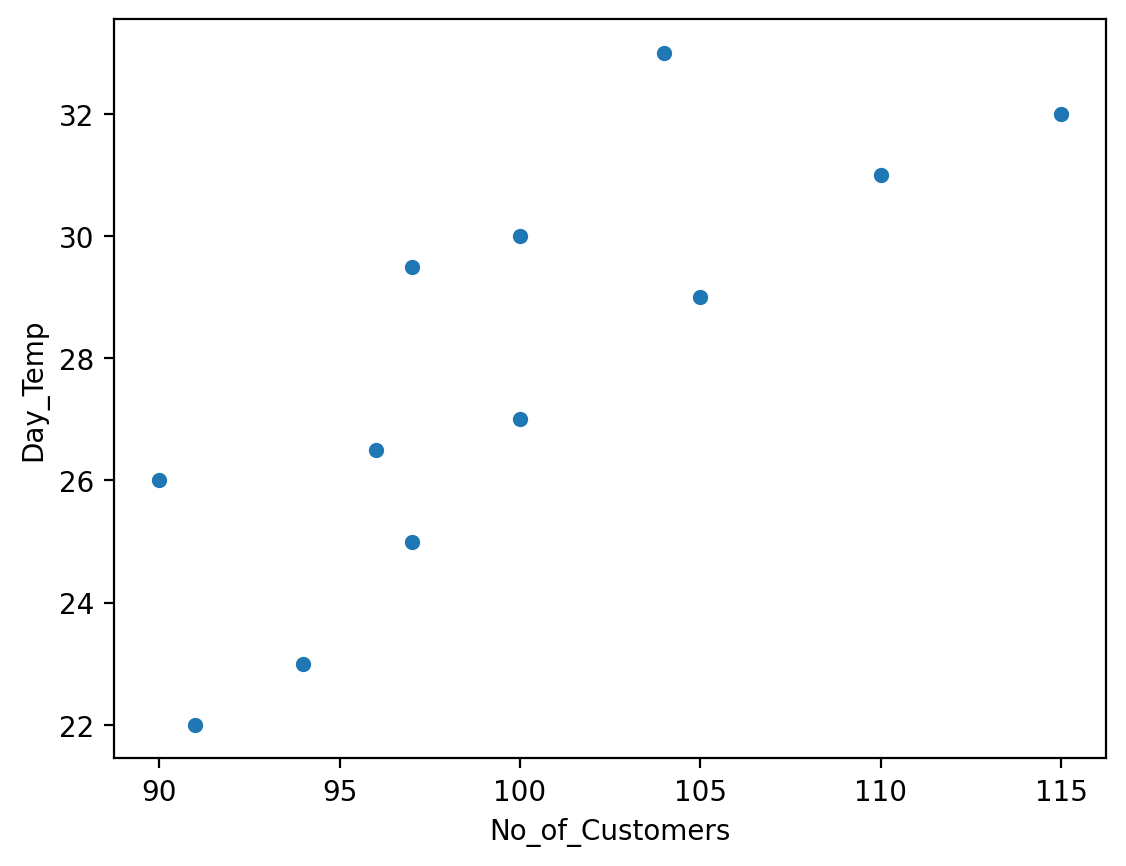

In [163]:
sns.scatterplot(df_sales, x="No_of_Customers", y="Day_Temp")

# Summary

There are many ways to *describe* our data:

- Measure **central tendency**.

- Measure its **variability**; **skewness** and **kurtosis**.

- Measure what **correlations** our data have.

All of these are **useful** and all of them are also **exploratory data analysis** (EDA).